In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 150

data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', dtype={'CodeEventOther': str, 'JobInterestOther': str})
data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

# Looking at the Sample
As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:
* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose. To do this, we're going to look at the JobRoleInterest column to create absolute and relative frequency tables of job roles that the respondents are interested in. We're mainly interested in two things:

1) How many new coders are interested in web and/or mobile development?

2) How many new coders are interested in more than one job role?

In [25]:
job_data = data['JobRoleInterest'].value_counts(normalize=True)*100

In [7]:
#setting up fonts
font = {'size': 14}

matplotlib.rc('font', **font)

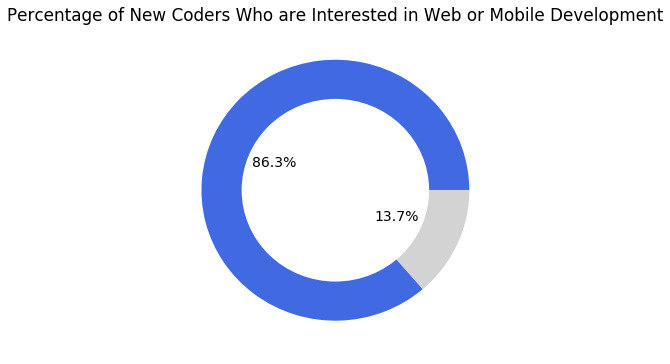

In [8]:
web_mobile_per = job_data[job_data.index.str.contains('web|mobile', case=False)].sum()
plot_points1 = [web_mobile_per, 100-web_mobile_per]

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(plot_points1,
        autopct='%1.1f%%',
        pctdistance=0.5,
        colors=['royalblue', 'lightgray'])
ax.set(title='Percentage of New Coders Who are Interested in Web or Mobile Development')
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

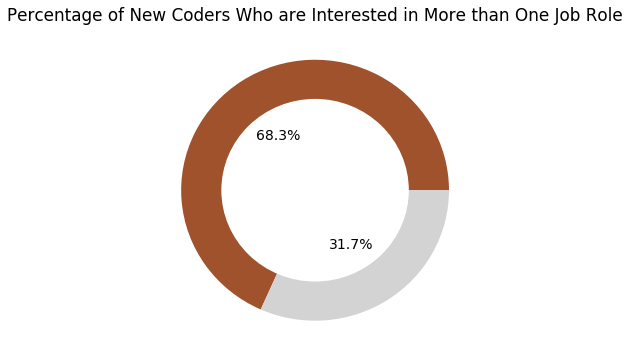

In [9]:
more_job_per = job_data[job_data.index.str.contains(',', case=False)].sum()
plot_points2 = [more_job_per, 100-more_job_per]

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(plot_points2,
        autopct='%1.1f%%',
        pctdistance=0.5,
        colors=['sienna', 'lightgray'])
ax.set(title='Percentage of New Coders Who are Interested in More than One Job Role')
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

Most of the new coders from the survey are interested in web or mobile development (86.3%) and most of them are interested in more than one job role (68.3%). This suggests that the company should offer programs for various types of roles and mainly focus on web and mobile development.

# Countries
In the next step, we will take analyze the countries that the new coders reside in.

In [10]:
data = data.dropna(subset=['JobRoleInterest'])
country_data = data['CountryLive'].value_counts(normalize=True).head(10)*100
country_data

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Name: CountryLive, dtype: float64

[Text(0.5,1,'10 Countries with Most New Coders')]

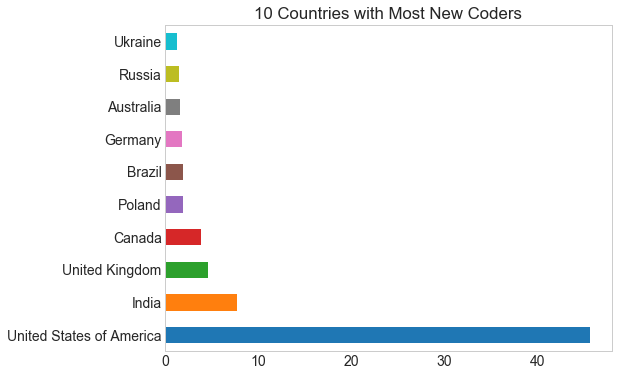

In [11]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
country_data.plot.barh(grid=False)
ax.set(title='10 Countries with Most New Coders')

Top four countries are USA, India, UK and Canada. Since we will be targetting the largets markets for marketing efficiency, we will focus on these countries in our analysis.

We're just getting started! Let's now analyze how much money new coders are willing to spend. We'll focus on the top four countries, since we're interested in looking for new coders who are fluent in English. 

# Analyzing Money Spent Monthly

In [24]:
#creating a new column for calculating how much money new coders are willing to spend per month
#replacing numerator to 1 if it is 0
data['MonthsProgramming'].replace(0,1,inplace=True)
data['MoneyPerMonth'] = data['MoneyForLearning'] / data['MonthsProgramming']

In [13]:
#dropping NaN values from columns MoneyPerMonth and CountryLive
data = data.dropna(subset = ['MoneyPerMonth', 'CountryLive'])

#only keeping in rows with the top four countries
data = data[data['CountryLive'].isin(['Canada', 'United Kingdom', 'India', 'United States of America'])]

#grouping by countries they live in
data.groupby('CountryLive')['MoneyPerMonth'].describe()

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,240.0,113.510961,441.014158,0.0,0.0,0.000000,25.000000,5000.0
India,463.0,135.100982,692.960378,0.0,0.0,0.000000,13.250000,10000.0
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.000000,20.416667,1400.0
United States of America,2933.0,227.997996,1940.245614,0.0,0.0,3.333333,50.000000,80000.0


We calculated the mean of money new coders are willing to spend per month with the top 4 countries, but somethings seems off. People in India are willing to pay a lot more than Canadians or the British. The British are also willing to pay very low amount relative to its peers - Canada and USA. The table above indicates that there may be some outliers. To visualized this, we'll create a boxplot.

# Identifying Outliers

[Text(0,0.5,''),
 Text(0.5,0,''),
 Text(0.5,1,'Amount of Money Willing to be Spent per Month')]

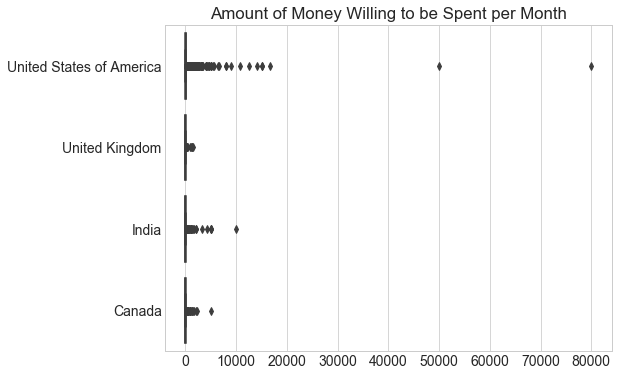

In [14]:
#plotting a boxplots
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='MoneyPerMonth', 
            y='CountryLive',
            data=data,
            ax=ax)
ax.set(title='Amount of Money Willing to be Spent per Month',
       ylabel='',
       xlabel='')

There are two individuals who are willing to spend 50,000 and 80,000 USD dollars - they are extreme outliers so we will drop them.

In [15]:
data = data[data['MoneyPerMonth']<50000]
data.groupby('CountryLive')['MoneyPerMonth'].describe()

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,240.0,113.510961,441.014158,0.0,0.0,0.000000,25.000000,5000.000000
India,463.0,135.100982,692.960378,0.0,0.0,0.000000,13.250000,10000.000000
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.000000,20.416667,1400.000000
United States of America,2931.0,183.800110,864.767219,0.0,0.0,3.333333,50.000000,16666.666667


It looks like we still have some extreme outliers. We'll visualize the data again and go more in depth in assessing if these outliers can be dropped or not.

[Text(0,0.5,''),
 Text(0.5,0,''),
 Text(0.5,1,'Amount of Money Willing to be Spent per Month')]

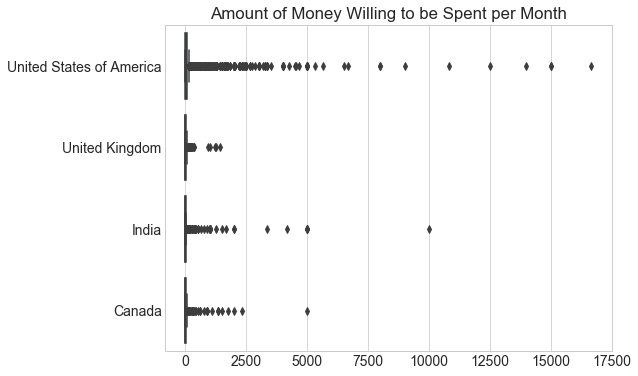

In [16]:
#plotting a boxplots
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='MoneyPerMonth', 
            y='CountryLive',
            data=data,
            ax=ax)
ax.set(title='Amount of Money Willing to be Spent per Month',
       ylabel='',
       xlabel='')

Outliers from Canada and India are easily identifiable, so we will drop them without further analysis. As with USA, we will delve into their responses a little deeper since it is unclear where we should cut off outliers from non-outliers.

In [17]:
india_canada_outlier = data[(data['CountryLive'].isin(['Canada', 'India'])) & 
                            (data['MoneyPerMonth']>2500)]
data = data.drop(india_canada_outlier.index)

In [20]:
data[(data['CountryLive']=='United States of America') & 
     (data['MoneyPerMonth']>5000)][['AttendedBootcamp', 'BootcampFinish', 'MonthsProgramming', 'MoneyPerMonth']]

,AttendedBootcamp,BootcampFinish,MonthsProgramming,MoneyPerMonth
718,1.0,0.0,1.0,8000.000000
1222,1.0,0.0,2.0,6500.000000
3145,1.0,0.0,3.0,5666.666667
3184,1.0,1.0,1.0,9000.000000
3930,0.0,NaN,6.0,10833.333333
6805,1.0,1.0,1.0,15000.000000
7198,0.0,NaN,5.0,14000.000000
7505,1.0,0.0,3.0,6666.666667
9778,1.0,0.0,1.0,8000.000000
13145,1.0,0.0,3.0,5333.333333


For those who did not attend coding boot camp programs, it is unclear where these outliers spent their money on coding, so we will drop these rows.

As with those who took boot camp programs, we will drop those who have not finished their boot camp programs. This is because at the time they were filling out the survey, they most likely had months of education left in their boot camp programs, making their MoneyPerMonth seem larger than it actually is.

In [22]:
usa_outliers = data[(data['CountryLive']=='United States of America') & 
                    (data['MoneyPerMonth']>5000) &
                    (data['AttendedBootcamp']==0) &
                    (data['BootcampFinish']!=1)]
data = data.drop(usa_outliers.index)

data.groupby('CountryLive')['MoneyPerMonth'].describe()

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,239.0,93.065400,307.512802,0.0,0.0,0.000000,25.000000,2337.166667
India,457.0,65.758763,233.452738,0.0,0.0,0.000000,12.500000,2000.000000
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.000000,20.416667,1400.000000
United States of America,2926.0,160.532509,651.714897,0.0,0.0,3.333333,50.000000,15000.000000


Going by this summary statistics table, we can definitively say that the company should target USA as its primary market location due to the large number of new coders interested in taking online courses at a substantially higher price than people in other countries.

If we are to choose another country, it will have to be India since they had the second highest number of new coders, and the subscription fee our hypothetical company is willing to charge is 59 USD per month. That is below the mean value of the amount of money new Indian coders are willing to pay on a monthly basis.